In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics

In [3]:
# perfFiles = "./scripts/sssp_trails_1_results.csv"
# new_data = pd.read_csv(fileName)
# new_data

In [59]:
def powerAnalyze(folder):
    dirpath = os.path.join(os.getcwd() + "/"+folder)
    total_pow = {}
    for filename in os.listdir(dirpath):
        ftemp = filename.split("_")
        cpuF,memF,gpuF = ftemp[ftemp.index('C')+1],ftemp[ftemp.index('M')+1],ftemp[ftemp.index('G')+1]
        f = os.path.join(dirpath, filename)
        file = open(f, 'r')
        lines = file.readlines()
        total_pow[(int(cpuF),int(memF),int(gpuF))] = 0
        mydata = []
        for line in lines:
            line = line.replace(" ",",")
            line = line.split(",")
            value = int(line[line.index('VDD_IN')+1].split("/")[0])
            mydata.append(value)
        
        total_pow[(int(cpuF),int(memF),int(gpuF))] = statistics.mean(mydata)/1000.0
    return total_pow

In [5]:
#This one needs modification
def perfAnalyze_GPU(folder="GPUBenchData"): 
    dirpath = os.path.join(os.getcwd() + "/"+folder)
    total_perf = {}
    for filename in os.listdir(dirpath):
        ftemp = filename.split("_")
        cpuF,memF,gpuF = ftemp[ftemp.index('C')+1],ftemp[ftemp.index('M')+1],ftemp[ftemp.index('G')+1]
        f = os.path.join(dirpath, filename)
        file = open(f, 'r')
        lines = file.readlines()
        total_perf[(int(cpuF),int(memF),int(gpuF))] = {}
        mydata = {}
        idx = 0
        for line in lines:
            if idx == 28: # This one is for GPU only
                sline = line.strip().replace(" ","")
                sline = sline.split(",")
                mydata['GFlops'] = [float(sline[3]),float(sline[7]),float(sline[11]),float(sline[15])]
                mydata['GBs'] = [float(sline[4]),float(sline[8]),float(sline[12]),float(sline[16])]
                mydata['time'] = [float(sline[2]),float(sline[6]),float(sline[10]),float(sline[14])]
            idx+= 1
        total_perf[(int(cpuF),int(memF),int(gpuF))] = mydata

    return total_perf

In [6]:
perfData = perfAnalyze_GPU()
print(perfData)

{(806400, 1331200000, 930750000): {'GFlops': [72.41, 14.44, 143.66, 72.94], 'GBs': [32.18, 12.84, 31.92, 32.42], 'time': [4.17, 20.91, 4.2, 4.14]}, (1267200, 1331200000, 930750000): {'GFlops': [72.81, 14.45, 142.85, 71.78], 'GBs': [32.36, 12.84, 31.74, 31.9], 'time': [4.15, 20.9, 4.23, 4.21]}, (1113600, 1062400000, 114750000): {'GFlops': [16.05, 1.78, 32.08, 16.06], 'GBs': [7.13, 1.59, 7.13, 7.14], 'time': [18.82, 169.3, 18.83, 18.81]}, (1420800, 102000000, 726750000): {'GFlops': [5.66, 2.83, 11.55, 5.65], 'GBs': [2.51, 2.52, 2.57, 2.51], 'time': [53.4, 106.57, 52.31, 53.48]}, (1420800, 68000000, 1122000000): {'GFlops': [3.4, 1.61, 6.68, 3.41], 'GBs': [1.51, 1.43, 1.48, 1.52], 'time': [88.87, 187.28, 90.42, 88.58]}, (499200, 68000000, 216750000): {'GFlops': [3.41, 1.22, 6.46, 2.01], 'GBs': [1.51, 1.09, 1.43, 0.89], 'time': [88.66, 246.99, 93.55, 150.33]}, (652800, 102000000, 1032750000): {'GFlops': [5.85, 2.85, 10.83, 5.8], 'GBs': [2.6, 2.54, 2.41, 2.58], 'time': [51.62, 105.81, 55.79,

In [7]:
#This one needs modification
def perfAnalyze_CPU(folder="CPUBenchData"): 
    dirpath = os.path.join(os.getcwd() + "/"+folder)
    total_perf = {}
    for filename in os.listdir(dirpath):
        ftemp = filename.split("_")
        cpuF,memF,gpuF = ftemp[ftemp.index('C')+1],ftemp[ftemp.index('M')+1],ftemp[ftemp.index('G')+1]
        f = os.path.join(dirpath, filename)
        file = open(f, 'r')
        lines = file.readlines()
        total_perf[(int(cpuF),int(memF),int(gpuF))] = {}
        mydata = {}
        idx = 0
        for line in lines:
            if idx > 12 and idx < 38:
                sline = line.strip()
                sline = sline.split(":")
                mydata[sline[0]] = float(sline[1])
            idx+= 1
        total_perf[(int(cpuF),int(memF),int(gpuF))] = mydata


    return total_perf

In [8]:
myCPU = perfAnalyze_CPU()

In [9]:
myCPU[(806400, 800000000, 1236750000)]

{'CPU_FLOATINGPOINT_MATH': 1379.0021352967537,
 'CPU_PRIME': 4.746451409744198,
 'CPU_SORTING': 2073.556255463585,
 'CPU_ENCRYPTION': 144.9792431493533,
 'CPU_COMPRESSION': 3609.924205455056,
 'CPU_SINGLETHREAD': 183.12922623289217,
 'CPU_PHYSICS': 81.54209926911678,
 'CPU_MATRIX_MULT_SSE': 305.67719912533244,
 'CPU_mm': 91.63669089528743,
 'CPU_sse': 215.1517170572408,
 'CPU_fma': 396.2026811934241,
 'CPU_avx': 0.0,
 'CPU_avx512': 0.0,
 'm_CPU_enc_SHA': 204519489.6428212,
 'm_CPU_enc_AES': 114802147.22296111,
 'm_CPU_enc_ECDSA': 136743627.7279466,
 'ME_ALLOC_S': 0.0,
 'ME_READ_S': 0.0,
 'ME_READ_L': 0.0,
 'ME_WRITE': 0.0,
 'ME_LARGE': 0.0,
 'ME_LATENCY': 0.0,
 'ME_THREADED': 0.0,
 'SUMM_CPU': 533.7187361088532,
 'SUMM_ME': 0.0}

In [10]:
#This one needs modification
def perfAnalyze_Mem(folder="MemBenchData"): 
    dirpath = os.path.join(os.getcwd() + "/"+folder)
    total_perf = {}
    for filename in os.listdir(dirpath):
        ftemp = filename.split("_")
        cpuF,memF,gpuF = ftemp[ftemp.index('C')+1],ftemp[ftemp.index('M')+1],ftemp[ftemp.index('G')+1]
        f = os.path.join(dirpath, filename)
        file = open(f, 'r')
        lines = file.readlines()
        total_perf[(int(cpuF),int(memF),int(gpuF))] = {}
        mydata = {}
        idx = 0
        for line in lines:
            if idx > 12 and idx < 38:
                sline = line.strip()
                sline = sline.split(":")
                mydata[sline[0]] = float(sline[1])
            idx+= 1
        total_perf[(int(cpuF),int(memF),int(gpuF))] = mydata


    return total_perf

In [11]:
myMem = perfAnalyze_Mem()
myMem[(806400, 800000000, 1236750000)]

{'CPU_FLOATINGPOINT_MATH': 0.0,
 'CPU_PRIME': 0.0,
 'CPU_SORTING': 0.0,
 'CPU_ENCRYPTION': 0.0,
 'CPU_COMPRESSION': 0.0,
 'CPU_SINGLETHREAD': 0.0,
 'CPU_PHYSICS': 0.0,
 'CPU_MATRIX_MULT_SSE': 0.0,
 'CPU_mm': 0.0,
 'CPU_sse': 0.0,
 'CPU_fma': 0.0,
 'CPU_avx': 0.0,
 'CPU_avx512': 0.0,
 'm_CPU_enc_SHA': 0.0,
 'm_CPU_enc_AES': 0.0,
 'm_CPU_enc_ECDSA': 0.0,
 'ME_ALLOC_S': 403.463591933359,
 'ME_READ_S': 2692.865686035156,
 'ME_READ_L': 2258.09619140625,
 'ME_WRITE': 3035.193603515625,
 'ME_LARGE': 4212.0,
 'ME_LATENCY': 257.90477309865383,
 'ME_THREADED': 3843.2313842773438,
 'SUMM_CPU': 0.0,
 'SUMM_ME': 401.5253072255278}

In [12]:
cpu_list = list(map(lambda x:x[0], perfData.keys()))
cpu_list = set(cpu_list)
cpu_list = sorted(list(cpu_list))
print(cpu_list)
mem_list = list(map(lambda x:x[1], perfData.keys()))
mem_list = set(mem_list)
mem_list = sorted(list(mem_list))
print(mem_list)  
gpu_list = list(map(lambda x:x[2], perfData.keys()))
gpu_list = set(gpu_list)
gpu_list = sorted(list(gpu_list))
print(gpu_list) 
    
    


[345600, 499200, 652800, 806400, 960000, 1113600, 1267200, 1420800]
[40800000, 68000000, 102000000, 204000000, 408000000, 665600000, 800000000, 1062400000, 1331200000, 1600000000, 1866000000]
[114750000, 216750000, 318750000, 420750000, 522750000, 624750000, 726750000, 854250000, 930750000, 1032750000, 1122000000, 1236750000, 1300500000]


In [13]:
mem_freq_display_list = [val/1000000 for val in mem_list]
cpu_freq_display_list = [val/1000 for val in cpu_list]
gpu_freq_display_list = [val/1000000 for val in gpu_list]

In [14]:
powerAnalyze("TegraDataGPU")

{(345600, 408000000, 420750000): 2347.914191419142,
 (806400, 1600000000, 114750000): 2814.2041884816754,
 (652800, 40800000, 114750000): 1920.7710750193348,
 (1267200, 1600000000, 420750000): 3414.936102236422,
 (1267200, 1866000000, 318750000): 3968.549636803874,
 (806400, 40800000, 114750000): 1957.5547892720306,
 (1113600, 40800000, 522750000): 2255.6595365418893,
 (960000, 1331200000, 1032750000): 4248.1,
 (1113600, 40800000, 854250000): 2526.718220338983,
 (960000, 1866000000, 420750000): 4002.74358974359,
 (960000, 1600000000, 318750000): 3159.3333333333335,
 (1420800, 40800000, 216750000): 2239.567664670659,
 (1267200, 408000000, 1032750000): 4230.3884892086335,
 (652800, 1331200000, 1122000000): 4474.366666666667,
 (1113600, 1600000000, 114750000): 2898.5975820379967,
 (960000, 1331200000, 1300500000): 5557.419047619048,
 (960000, 408000000, 624750000): 2733.705069124424,
 (345600, 40800000, 726750000): 2223.4901531728665,
 (1420800, 102000000, 1032750000): 3394.9,
 (652800, 2

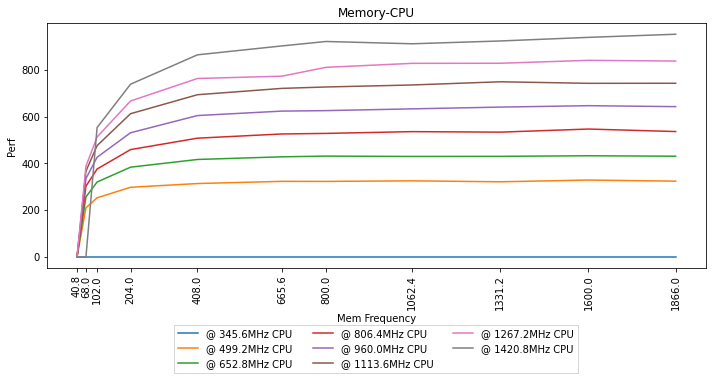

In [25]:
## Plot the impact of Mem, GPU, and CPU

#fixedCPU
gpu_f = gpu_list[12]
perfCPU = perfAnalyze_CPU()
# xs = gpu_freq_display_list
xs = mem_freq_display_list
ys = []
ys_label = []
# for j,mem_f in enumerate(mem_list):
#     ytemp = []
#     for gpu_f in gpu_list:
#         ytemp.append(perfData[(cpu_f,mem_f,gpu_f)]['GFlops'][3])
#     ys.append(ytemp)
#     ys_label.append("@ {}MHz MEM".format(mem_freq_display_list[j]))

for j,cpu_f in enumerate(cpu_list):
#     if j%2 == 1:
#         continue
    ytemp = []
    for mem_f in mem_list:
        ytemp.append(perfCPU[(cpu_f,mem_f,gpu_f)]['SUMM_CPU'])
    ys.append(ytemp)
    ys_label.append("@ {}MHz CPU".format(cpu_freq_display_list[j]))

fig = plt.figure(figsize=(10,5))
# figsize=(1,1)
ax = plt.subplot(111)
for i, y in enumerate(ys):
    ax.plot(xs, y, label=ys_label[i])
plt.xticks(xs, mem_freq_display_list,rotation=90)
# plt.titl e("Performance CPU@{}".format(cpu_f))
plt.title("Memory-CPU")
plt.xlabel("Mem Frequency")
plt.ylabel("Perf")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                box.width, box.height * 0.9])
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.21),
        fancybox=False, shadow=False, ncol=3)
plt.tight_layout()
plt.show()

In [ ]:
perfCPU = perfAnalyze_CPU()
perfCPU

{(806400,
  800000000,
  1236750000): {'CPU_FLOATINGPOINT_MATH': 1379.0021352967537, 'CPU_PRIME': 4.746451409744198, 'CPU_SORTING': 2073.556255463585, 'CPU_ENCRYPTION': 144.9792431493533, 'CPU_COMPRESSION': 3609.924205455056, 'CPU_SINGLETHREAD': 183.12922623289217, 'CPU_PHYSICS': 81.54209926911678, 'CPU_MATRIX_MULT_SSE': 305.67719912533244, 'CPU_mm': 91.63669089528743, 'CPU_sse': 215.1517170572408, 'CPU_fma': 396.2026811934241, 'CPU_avx': 0.0, 'CPU_avx512': 0.0, 'm_CPU_enc_SHA': 204519489.6428212, 'm_CPU_enc_AES': 114802147.22296111, 'm_CPU_enc_ECDSA': 136743627.7279466, 'ME_ALLOC_S': 0.0, 'ME_READ_S': 0.0, 'ME_READ_L': 0.0, 'ME_WRITE': 0.0, 'ME_LARGE': 0.0, 'ME_LATENCY': 0.0, 'ME_THREADED': 0.0, 'SUMM_CPU': 533.7187361088532, 'SUMM_ME': 0.0},
 (1420800,
  1331200000,
  522750000): {'CPU_FLOATINGPOINT_MATH': 2445.104797729052, 'CPU_PRIME': 7.417559361280955, 'CPU_SORTING': 3725.9209928882565, 'CPU_ENCRYPTION': 251.45471774337037, 'CPU_COMPRESSION': 6569.085134529633, 'CPU_SINGLETHREAD'

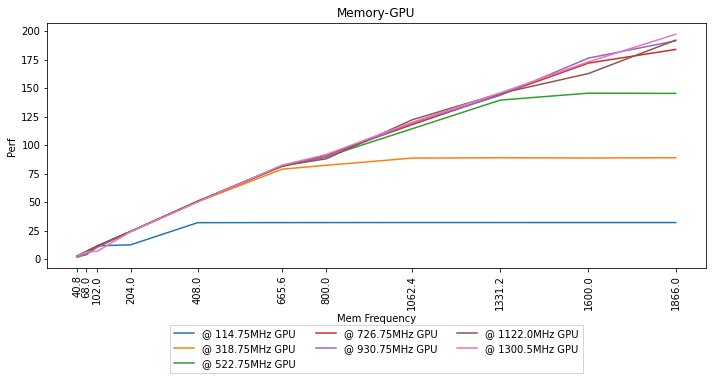

In [17]:
## Plot the impact of Mem, GPU, and CPU

#fixedCPU
cpu_f = cpu_list[7]

# xs = gpu_freq_display_list
xs = mem_freq_display_list
ys = []
ys_label = []
# for j,mem_f in enumerate(mem_list):
#     ytemp = []
#     for gpu_f in gpu_list:
#         ytemp.append(perfData[(cpu_f,mem_f,gpu_f)]['GFlops'][3])
#     ys.append(ytemp)
#     ys_label.append("@ {}MHz MEM".format(mem_freq_display_list[j]))

for j,gpu_f in enumerate(gpu_list):
    if j%2 == 1:
        continue
    ytemp = []
    for mem_f in mem_list:
        ytemp.append(perfData[(cpu_f,mem_f,gpu_f)]['GFlops'][2])
    ys.append(ytemp)
    ys_label.append("@ {}MHz GPU".format(gpu_freq_display_list[j]))

fig = plt.figure(figsize=(10,5))
# figsize=(1,1)
ax = plt.subplot(111)
for i, y in enumerate(ys):
    ax.plot(xs, y, label=ys_label[i])
plt.xticks(xs, mem_freq_display_list,rotation=90)
# plt.titl e("Performance CPU@{}".format(cpu_f))
plt.title("Memory-GPU")
plt.xlabel("Mem Frequency")
plt.ylabel("Perf")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                box.width, box.height * 0.9])
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.21),
        fancybox=False, shadow=False, ncol=3)
plt.tight_layout()
plt.show()

In [18]:
from scipy.stats import pearsonr   
from scipy.stats import spearmanr

In [19]:
perfDataGPU = perfAnalyze_GPU()
dFreq = [[],[],[]]
perfD = []
for key in perfDataGPU:
    dFreq[0].append(key[0])
    dFreq[1].append(key[1])
    dFreq[2].append(key[2])
    perfD.append(perfDataGPU[key]['GFlops'][1])
print(pearsonr(dFreq[2],perfD))
print("CPUF-GPUP :",spearmanr(dFreq[0],perfD))
print("MemF-GPUP :",spearmanr(dFreq[1],perfD))
print("GPUF-GPUP :",spearmanr(dFreq[2],perfD))
    
    

PearsonRResult(statistic=0.5864457471792096, pvalue=1.2215711678833512e-106)
CPUF-GPUP : SignificanceResult(statistic=0.003060691282569032, pvalue=0.9176383346806561)
MemF-GPUP : SignificanceResult(statistic=0.6912858227097546, pvalue=2.4079985906915428e-163)
GPUF-GPUP : SignificanceResult(statistic=0.49355092419776364, pvalue=2.805957051676772e-71)


In [20]:
perfDataCPU = perfAnalyze_CPU()
# print(perfDataCPU)
dFreq = [[],[],[]]
perfD = []
for key in perfDataCPU:
    dFreq[0].append(key[0])
    dFreq[1].append(key[1])
    dFreq[2].append(key[2])
    perfD.append(perfDataCPU[key]['SUMM_CPU'])
print(pearsonr(dFreq[0],perfD))
print("CPUF-CPUP : ",spearmanr(dFreq[0],perfD))
print("MemF-CPUP : ",spearmanr(dFreq[1],perfD))
print("GPUF-CPUP : ",spearmanr(dFreq[2],perfD))

PearsonRResult(statistic=0.7297433542056037, pvalue=8.736901827267894e-191)
CPUF-CPUP :  SignificanceResult(statistic=0.7506942581104997, pvalue=8.025522493784662e-208)
MemF-CPUP :  SignificanceResult(statistic=0.48169742821099554, pvalue=1.6587493438563297e-67)
GPUF-CPUP :  SignificanceResult(statistic=0.0026931048522732086, pvalue=0.9275008093549142)


In [21]:
perfDataMem = perfAnalyze_Mem()
# print(perfDataCPU)
dFreq = [[],[],[]]
perfD = []
for key in perfDataMem:
    dFreq[0].append(key[0])
    dFreq[1].append(key[1])
    dFreq[2].append(key[2])
    perfD.append(perfDataMem[key]['SUMM_ME'])
print(pearsonr(dFreq[1],perfD))
print("CPUF-MemP : ",spearmanr(dFreq[0],perfD))
print("MemF-MemP : ",spearmanr(dFreq[1],perfD))
print("GPUF-MemP : ",spearmanr(dFreq[2],perfD))

PearsonRResult(statistic=0.8180673715155673, pvalue=1.2772592366897966e-276)
CPUF-MemP :  SignificanceResult(statistic=0.3602437715523054, pvalue=2.204755546508743e-36)
MemF-MemP :  SignificanceResult(statistic=0.8700002218295807, pvalue=0.0)
GPUF-MemP :  SignificanceResult(statistic=-0.0007442013645696896, pvalue=0.9799403752801569)


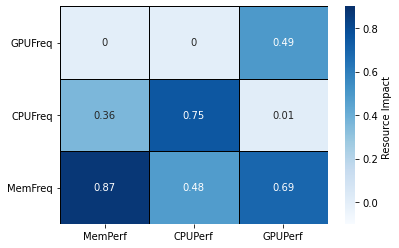

In [22]:
import pandas as pd
import seaborn as sb
# Create a dataFrame using dictionary
np.bool = np.bool_ 
data =pd.DataFrame([[0.00,0.0,0.49],[0.36,0.75,0.01],[0.87,0.48,0.69]])
xtick = ['MemPerf','CPUPerf','GPUPerf']
ytick = ['GPUFreq','CPUFreq','MemFreq']
data.columns = ['MemPerf', 'CPUPerf', 'GPUPerf']
data.index = ['GPUFreq', 'CPUFreq', 'MemFreq']
sb.heatmap(data,cmap="Blues", annot=True,vmin=-0.1,vmax=0.9,cbar_kws={'label': 'Resource Impact '},linecolor='black',linewidths=1)
plt.yticks(rotation=0) 

# plt.show()
plt.savefig("RI_TX2.svg")

# Get the config lists

In [305]:
cpu_perf = perfAnalyze_CPU()

In [306]:
cpu_P = {}
max_val = 0
min_val = 100000
for key in cpu_perf:
    cpu_P[key] = cpu_perf[key]["CPU_SORTING"]
    if cpu_P[key] > max_val:
        max_val = cpu_P[key]
    if min_val >  cpu_P[key]:
        min_val = cpu_P[key]
print(max_val, min_val)
for key in cpu_P:
    cpu_P[key] = cpu_P[key]

3876.735108648349 0.0


In [307]:
mem_perf = perfAnalyze_Mem()


In [308]:
mem_P = {}
max_val = 0
min_val = 100000
for key in mem_perf:
    mem_P[key] = mem_perf[key]["SUMM_ME"]
    if mem_P[key] > max_val:
        max_val = mem_P[key]
    if min_val >  mem_P[key]:
        min_val = mem_P[key]
print(max_val, min_val)
for key in mem_P:
    mem_P[key] = mem_P[key] 

681.0676247095267 20.049767681861983


In [309]:
mem_P

{(499200, 68000000, 726750000): 61.54370142078014,
 (499200, 1600000000, 318750000): 334.29010882355743,
 (499200, 1866000000, 420750000): 335.4102212018687,
 (1420800, 1062400000, 318750000): 572.8491545042483,
 (345600, 1062400000, 1300500000): 237.5087730220807,
 (345600, 408000000, 624750000): 195.57259485883048,
 (1420800, 68000000, 1032750000): 67.7547544426347,
 (1420800, 408000000, 318750000): 353.8971451630296,
 (806400, 1062400000, 1032750000): 439.6334865703912,
 (652800, 1600000000, 114750000): 412.85810691653484,
 (652800, 68000000, 1032750000): 64.0999580417399,
 (1420800, 68000000, 624750000): 67.76017728742858,
 (652800, 408000000, 318750000): 272.85345205538977,
 (806400, 1062400000, 1300500000): 438.48219545792455,
 (345600, 1062400000, 1032750000): 235.09104822815556,
 (960000, 408000000, 420750000): 314.7701310168832,
 (345600, 40800000, 216750000): 34.00390588681934,
 (960000, 102000000, 624750000): 101.53275356467542,
 (499200, 1600000000, 1032750000): 332.0681380

In [310]:
gpu_perf = perfAnalyze_GPU()


In [311]:
gpu_P = {}
max_val = 0
min_val = 100000
for key in gpu_perf:
    gpu_P[key] = gpu_perf[key]["GFlops"][2]
    if gpu_P[key] > max_val:
        max_val = gpu_P[key]
    if min_val >  gpu_P[key]:
        min_val = gpu_P[key]
print(max_val, min_val)
for key in mem_P:
    gpu_P[key] = gpu_P[key] 

204.51 0.51


In [312]:
gpu_P

{(806400, 1331200000, 930750000): 143.66,
 (1267200, 1331200000, 930750000): 142.85,
 (1113600, 1062400000, 114750000): 32.08,
 (1420800, 102000000, 726750000): 11.55,
 (1420800, 68000000, 1122000000): 6.68,
 (499200, 68000000, 216750000): 6.46,
 (652800, 102000000, 1032750000): 10.83,
 (1267200, 68000000, 114750000): 6.65,
 (806400, 408000000, 854250000): 50.0,
 (1113600, 800000000, 854250000): 90.8,
 (1420800, 1331200000, 216750000): 60.42,
 (1113600, 665600000, 1032750000): 82.25,
 (1267200, 204000000, 1236750000): 24.32,
 (345600, 102000000, 1300500000): 11.84,
 (806400, 204000000, 1236750000): 23.96,
 (1267200, 1062400000, 420750000): 109.83,
 (806400, 1062400000, 420750000): 111.49,
 (1113600, 1331200000, 624750000): 112.58,
 (499200, 204000000, 930750000): 22.29,
 (345600, 800000000, 216750000): 59.97,
 (1420800, 40800000, 1236750000): 1.47,
 (806400, 1866000000, 522750000): 144.84,
 (1267200, 1866000000, 522750000): 145.41,
 (806400, 665600000, 726750000): 81.5,
 (652800, 80000

In [313]:
cpu_pow = powerAnalyze("TegraDataCPU")

In [314]:
mem_pow = powerAnalyze("TegraDataMem")

In [315]:
gpu_pow = powerAnalyze("TegraDataGPU")

In [316]:
gpu_pow

{(345600, 408000000, 420750000): 2.3479141914191417,
 (806400, 1600000000, 114750000): 2.8142041884816753,
 (652800, 40800000, 114750000): 1.9207710750193348,
 (1267200, 1600000000, 420750000): 3.414936102236422,
 (1267200, 1866000000, 318750000): 3.968549636803874,
 (806400, 40800000, 114750000): 1.9575547892720306,
 (1113600, 40800000, 522750000): 2.255659536541889,
 (960000, 1331200000, 1032750000): 4.2481,
 (1113600, 40800000, 854250000): 2.526718220338983,
 (960000, 1866000000, 420750000): 4.00274358974359,
 (960000, 1600000000, 318750000): 3.1593333333333335,
 (1420800, 40800000, 216750000): 2.2395676646706586,
 (1267200, 408000000, 1032750000): 4.230388489208633,
 (652800, 1331200000, 1122000000): 4.474366666666667,
 (1113600, 1600000000, 114750000): 2.8985975820379966,
 (960000, 1331200000, 1300500000): 5.557419047619048,
 (960000, 408000000, 624750000): 2.733705069124424,
 (345600, 40800000, 726750000): 2.2234901531728664,
 (1420800, 102000000, 1032750000): 3.3949000000000003,

In [460]:
CPU_FREQ_COL = "CPU Frequencies"
GPU_FREQ_COL = "GPU Frequencies"
MEM_FREQ_COL = "Mem Frequencies"
CPU_SCORE = "CPU Score"
CPU_POW = "CPU Power"
MEM_SCORE = "Mem Score"
MEM_POW = "Mem Power"
GPU_SCORE = "GPU Score"
GPU_POW = "GPU Power"


In [461]:
column_names=[CPU_FREQ_COL,MEM_FREQ_COL,GPU_FREQ_COL,CPU_SCORE, CPU_POW, MEM_SCORE,MEM_POW,GPU_SCORE,GPU_POW]

In [462]:
plot_df=pd.DataFrame(columns=column_names)

In [463]:
plot_df

,CPU Frequencies,Mem Frequencies,GPU Frequencies,CPU Score,CPU Power,Mem Score,Mem Power,GPU Score,GPU Power


In [464]:
for key in cpu_P:
    plot_df.loc[len(plot_df.index)] = [key[0],key[1],key[2],cpu_P[key],cpu_pow[key],mem_P[key],mem_pow[key],gpu_P[key],gpu_pow[key]]

In [465]:
plot_df

,CPU Frequencies,Mem Frequencies,GPU Frequencies,CPU Score,CPU Power,Mem Score,Mem Power,GPU Score,GPU Power
0,806400.0,8.000000e+08,1.236750e+09,2073.556255,2.498589,401.525307,2.213305,91.29,4.925518
1,1420800.0,1.331200e+09,5.227500e+08,3725.920993,3.360093,621.591560,2.807783,139.51,3.222402
2,1420800.0,6.800000e+07,1.236750e+09,540.052870,2.630446,66.530269,2.116187,6.65,3.626146
3,345600.0,1.331200e+09,2.167500e+08,903.689531,2.282648,241.490574,2.100350,60.09,2.410478
4,1267200.0,6.656000e+08,8.542500e+08,3051.410652,2.824766,451.010525,2.378434,82.13,3.537019
...,...,...,...,...,...,...,...,...,...
1139,1267200.0,4.080000e+08,9.307500e+08,2612.018140,2.676933,338.160727,2.590188,50.70,3.575553
1140,499200.0,6.656000e+08,1.236750e+09,1315.790024,2.171870,291.046417,2.469055,81.26,4.651652
1141,1113600.0,4.080000e+08,4.207500e+08,2425.998215,2.879953,327.243105,2.074200,50.67,2.510247
1142,1113600.0,4.080000e+08,1.236750e+09,2426.055735,2.513293,329.568523,2.169927,50.78,4.601420


In [466]:
nu = 1.0
CPU_PDP = "CPU_PDP_"+str(nu)
MEM_PDP = "MEM_PDP_"+str(nu)
GPU_PDP = "GPU_PDP_"+str(nu)
PDP = "PDP_"+str(nu)
plot_df[CPU_PDP] = pow(plot_df[CPU_SCORE],nu)/plot_df[CPU_POW]
plot_df[MEM_PDP] = pow(plot_df[MEM_SCORE],nu)/plot_df[MEM_POW]
plot_df[GPU_PDP] = pow(plot_df[GPU_SCORE],nu)/plot_df[GPU_POW]

In [467]:
plot_df

,CPU Frequencies,Mem Frequencies,GPU Frequencies,CPU Score,CPU Power,Mem Score,Mem Power,GPU Score,GPU Power,CPU_PDP_1.0,MEM_PDP_1.0,GPU_PDP_1.0
0,806400.0,8.000000e+08,1.236750e+09,2073.556255,2.498589,401.525307,2.213305,91.29,4.925518,829.890839,181.414371,18.534092
1,1420800.0,1.331200e+09,5.227500e+08,3725.920993,3.360093,621.591560,2.807783,139.51,3.222402,1108.874324,221.381632,43.293797
2,1420800.0,6.800000e+07,1.236750e+09,540.052870,2.630446,66.530269,2.116187,6.65,3.626146,205.308512,31.438753,1.833903
3,345600.0,1.331200e+09,2.167500e+08,903.689531,2.282648,241.490574,2.100350,60.09,2.410478,395.895219,114.976331,24.928664
4,1267200.0,6.656000e+08,8.542500e+08,3051.410652,2.824766,451.010525,2.378434,82.13,3.537019,1080.234824,189.625015,23.220120
...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1267200.0,4.080000e+08,9.307500e+08,2612.018140,2.676933,338.160727,2.590188,50.70,3.575553,975.750420,130.554502,14.179626
1140,499200.0,6.656000e+08,1.236750e+09,1315.790024,2.171870,291.046417,2.469055,81.26,4.651652,605.832757,117.877663,17.469063
1141,1113600.0,4.080000e+08,4.207500e+08,2425.998215,2.879953,327.243105,2.074200,50.67,2.510247,842.374364,157.768313,20.185266
1142,1113600.0,4.080000e+08,1.236750e+09,2426.055735,2.513293,329.568523,2.169927,50.78,4.601420,965.289815,151.880030,11.035723


In [468]:
max(plot_df[CPU_PDP]) , max(plot_df[MEM_PDP]), max(plot_df[GPU_PDP])

(1131.8925249294234, 221.55284789473572, 47.244253602840246)

In [469]:
min(plot_df[CPU_PDP]) , min(plot_df[MEM_PDP]), min(plot_df[GPU_PDP])

(0.0, 7.199464785117339, 0.24659970507602275)

In [470]:
plot_df[CPU_PDP] = plot_df[CPU_PDP]#/max(plot_df[CPU_PDP])
plot_df[MEM_PDP] = plot_df[MEM_PDP]#/max(plot_df[MEM_PDP])
plot_df[GPU_PDP] = plot_df[GPU_PDP]#/max(plot_df[GPU_PDP])

In [471]:
plot_df

,CPU Frequencies,Mem Frequencies,GPU Frequencies,CPU Score,CPU Power,Mem Score,Mem Power,GPU Score,GPU Power,CPU_PDP_1.0,MEM_PDP_1.0,GPU_PDP_1.0
0,806400.0,8.000000e+08,1.236750e+09,2073.556255,2.498589,401.525307,2.213305,91.29,4.925518,829.890839,181.414371,18.534092
1,1420800.0,1.331200e+09,5.227500e+08,3725.920993,3.360093,621.591560,2.807783,139.51,3.222402,1108.874324,221.381632,43.293797
2,1420800.0,6.800000e+07,1.236750e+09,540.052870,2.630446,66.530269,2.116187,6.65,3.626146,205.308512,31.438753,1.833903
3,345600.0,1.331200e+09,2.167500e+08,903.689531,2.282648,241.490574,2.100350,60.09,2.410478,395.895219,114.976331,24.928664
4,1267200.0,6.656000e+08,8.542500e+08,3051.410652,2.824766,451.010525,2.378434,82.13,3.537019,1080.234824,189.625015,23.220120
...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1267200.0,4.080000e+08,9.307500e+08,2612.018140,2.676933,338.160727,2.590188,50.70,3.575553,975.750420,130.554502,14.179626
1140,499200.0,6.656000e+08,1.236750e+09,1315.790024,2.171870,291.046417,2.469055,81.26,4.651652,605.832757,117.877663,17.469063
1141,1113600.0,4.080000e+08,4.207500e+08,2425.998215,2.879953,327.243105,2.074200,50.67,2.510247,842.374364,157.768313,20.185266
1142,1113600.0,4.080000e+08,1.236750e+09,2426.055735,2.513293,329.568523,2.169927,50.78,4.601420,965.289815,151.880030,11.035723


In [472]:
plot_df[PDP] = plot_df[CPU_PDP] + plot_df[MEM_PDP] + plot_df[GPU_PDP]

In [473]:
plot_df

,CPU Frequencies,Mem Frequencies,GPU Frequencies,CPU Score,CPU Power,Mem Score,Mem Power,GPU Score,GPU Power,CPU_PDP_1.0,MEM_PDP_1.0,GPU_PDP_1.0,PDP_1.0
0,806400.0,8.000000e+08,1.236750e+09,2073.556255,2.498589,401.525307,2.213305,91.29,4.925518,829.890839,181.414371,18.534092,1029.839302
1,1420800.0,1.331200e+09,5.227500e+08,3725.920993,3.360093,621.591560,2.807783,139.51,3.222402,1108.874324,221.381632,43.293797,1373.549753
2,1420800.0,6.800000e+07,1.236750e+09,540.052870,2.630446,66.530269,2.116187,6.65,3.626146,205.308512,31.438753,1.833903,238.581168
3,345600.0,1.331200e+09,2.167500e+08,903.689531,2.282648,241.490574,2.100350,60.09,2.410478,395.895219,114.976331,24.928664,535.800214
4,1267200.0,6.656000e+08,8.542500e+08,3051.410652,2.824766,451.010525,2.378434,82.13,3.537019,1080.234824,189.625015,23.220120,1293.079959
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1267200.0,4.080000e+08,9.307500e+08,2612.018140,2.676933,338.160727,2.590188,50.70,3.575553,975.750420,130.554502,14.179626,1120.484549
1140,499200.0,6.656000e+08,1.236750e+09,1315.790024,2.171870,291.046417,2.469055,81.26,4.651652,605.832757,117.877663,17.469063,741.179483
1141,1113600.0,4.080000e+08,4.207500e+08,2425.998215,2.879953,327.243105,2.074200,50.67,2.510247,842.374364,157.768313,20.185266,1020.327943
1142,1113600.0,4.080000e+08,1.236750e+09,2426.055735,2.513293,329.568523,2.169927,50.78,4.601420,965.289815,151.880030,11.035723,1128.205569


In [474]:
min(plot_df[PDP])

11.114994205600343

In [475]:
sort_df = plot_df.sort_values(by=[PDP], ascending=False)

In [476]:
sort_df

,CPU Frequencies,Mem Frequencies,GPU Frequencies,CPU Score,CPU Power,Mem Score,Mem Power,GPU Score,GPU Power,CPU_PDP_1.0,MEM_PDP_1.0,GPU_PDP_1.0,PDP_1.0
1,1420800.0,1.331200e+09,5.227500e+08,3725.920993,3.360093,621.591560,2.807783,139.51,3.222402,1108.874324,221.381632,43.293797,1373.549753
247,1420800.0,1.062400e+09,6.247500e+08,3635.869968,3.249038,571.518382,2.700282,119.96,3.300474,1119.060597,211.651368,36.346293,1367.058257
936,1420800.0,1.062400e+09,3.187500e+08,3638.669213,3.239828,572.849155,2.702711,88.64,2.829901,1123.105845,211.953537,31.322651,1366.382033
292,1420800.0,1.062400e+09,4.207500e+08,3629.264603,3.246627,571.906808,2.722850,112.62,2.979315,1117.856988,210.039778,37.800632,1365.697397
33,1420800.0,1.331200e+09,7.267500e+08,3713.411749,3.374254,617.788415,2.808341,144.45,3.541391,1100.513458,219.983424,40.789054,1361.285935
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1113600.0,4.080000e+07,1.300500e+09,0.230002,2.407249,36.599515,2.077053,2.98,3.246339,0.095545,17.620885,0.917957,18.634387
312,1420800.0,4.080000e+07,8.542500e+08,0.227879,2.569279,36.815946,2.083567,1.67,2.689444,0.088694,17.669670,0.620946,18.379310
686,1420800.0,4.080000e+07,1.032750e+09,0.237858,2.588757,36.822022,2.131862,1.69,2.911123,0.091881,17.272232,0.580532,17.944645
1136,1420800.0,4.080000e+07,1.300500e+09,0.000000,2.945943,36.792417,2.228332,2.63,3.443174,0.000000,16.511191,0.763830,17.275022


In [477]:
MYVAL = PDP
tot_freq = [cpu_list,mem_list]
tot_idx = [CPU_FREQ_COL,GPU_FREQ_COL,MEM_FREQ_COL]
val_idx = [CPU_FREQ_COL,GPU_FREQ_COL,MEM_FREQ_COL,MYVAL]
comp_idx=[CPU_FREQ_COL,MEM_FREQ_COL]

In [478]:
# Mem -GPU
complete_set = set()
for i in range(len(gpu_list)):
    for j in range(len(mem_list)):
        gidx = sort_df[ (sort_df[GPU_FREQ_COL] == gpu_list[i])].index.to_list()
#             print(len(midx))
        midx = sort_df[ (sort_df[MEM_FREQ_COL] == mem_list[j])].index.to_list()
        lidx = sort_df[ (sort_df[GPU_FREQ_COL] == gpu_list[i]) & (sort_df[MEM_FREQ_COL] == mem_list[j])  ].index[0]
        gpuval = gidx.index(lidx)
        memval = midx.index(lidx)
#             print(gpuval,memval)
        dfVal = plot_df.iloc[lidx][val_idx].to_list()
        dfVal = list(dfVal)
#             dfVal = dfVal.append(min(gpuval,memval))
#             dfVal.append(10-min(min(gpuval,memval),10))
        val = tuple(dfVal)
#             print(val)
        complete_set.add(val)
#             print(val) Commented code for heatmap
#             if cpu_list[i] not in complete_set:
#                 complete_set[cpu_list[i]] = {}
#             complete_set[cpu_list[i]][mem_list[j]] = val[3]

In [479]:
MG_Cset = complete_set

In [480]:
# CPU - Mem
complete_set = set()
for i in range(len(cpu_list)):
    for j in range(len(mem_list)):
        cidx = sort_df[ (sort_df[CPU_FREQ_COL] == cpu_list[i])].index.to_list()
#             print(len(midx))
        midx = sort_df[ (sort_df[MEM_FREQ_COL] == mem_list[j])].index.to_list()
        lidx = sort_df[ (sort_df[CPU_FREQ_COL] == cpu_list[i]) & (sort_df[MEM_FREQ_COL] == mem_list[j])  ].index[0]
        cpuval = cidx.index(lidx)
        memval = midx.index(lidx)
#             print(gpuval,memval)
        dfVal = plot_df.iloc[lidx][val_idx].to_list()
        dfVal = list(dfVal)
#             dfVal = dfVal.append(min(gpuval,memval))
#             dfVal.append(10-min(min(gpuval,memval),10))
        val = tuple(dfVal)
#             print(val)
        complete_set.add(val)
#             print(val) Commented code for heatmap
#             if cpu_list[i] not in complete_set:
#                 complete_set[cpu_list[i]] = {}
#             complete_set[cpu_list[i]][mem_list[j]] = val[3]

In [481]:
CM_Cset = complete_set

In [482]:
# CPU - Mem
complete_set = set()
for i in range(len(cpu_list)):
    for j in range(len(gpu_list)):
        cidx = sort_df[ (sort_df[CPU_FREQ_COL] == cpu_list[i])].index.to_list()
#             print(len(midx))
        gidx = sort_df[ (sort_df[GPU_FREQ_COL] == gpu_list[j])].index.to_list()
        lidx = sort_df[ (sort_df[CPU_FREQ_COL] == cpu_list[i]) & (sort_df[GPU_FREQ_COL] == gpu_list[j])  ].index[0]
        cpuval = cidx.index(lidx)
        gpuval = gidx.index(lidx)
#             print(gpuval,memval)
        dfVal = plot_df.iloc[lidx][val_idx].to_list()
        dfVal = list(dfVal)
#             dfVal = dfVal.append(min(gpuval,memval))
#             dfVal.append(10-min(min(gpuval,memval),10))
        val = tuple(dfVal)
#             print(val)
        complete_set.add(val)
#             print(val) Commented code for heatmap
#             if cpu_list[i] not in complete_set:
#                 complete_set[cpu_list[i]] = {}
#             complete_set[cpu_list[i]][mem_list[j]] = val[3]

In [483]:
CG_Cset = complete_set

In [484]:
def getSettings(PPRSet,idx):
    # Get a dictionary which gives stores the 
    gov_setting = {}
    for values in PPRSet:
        freq_val = values[idx]
        if freq_val not in gov_setting:
            gov_setting[freq_val] = (4*values[3], (values[0],values[1],values[2]))
        elif gov_setting[freq_val][0] < 4*values[3]:
            gov_setting[freq_val] = (4*values[3], (values[0],values[1],values[2]))
    sorted_dict = dict(sorted(gov_setting.items()))
    return sorted_dict

In [485]:
getSettings(CG_Cset,0)

{345600.0: (2400.9798312422595, (345600.0, 318750000.0, 800000000.0)),
 499200.0: (3233.574796514191, (499200.0, 522750000.0, 800000000.0)),
 652800.0: (3940.0398617136275, (652800.0, 420750000.0, 665600000.0)),
 806400.0: (4524.332345735023, (806400.0, 318750000.0, 665600000.0)),
 960000.0: (4887.853309946814, (960000.0, 522750000.0, 665600000.0)),
 1113600.0: (5196.303945306085, (1113600.0, 318750000.0, 665600000.0)),
 1267200.0: (5305.750367109702, (1267200.0, 522750000.0, 1331200000.0)),
 1420800.0: (5494.19901201342, (1420800.0, 522750000.0, 1331200000.0))}

In [486]:
getSettings(CM_Cset,0)

{345600.0: (2400.9798312422595, (345600.0, 318750000.0, 800000000.0)),
 499200.0: (3233.574796514191, (499200.0, 522750000.0, 800000000.0)),
 652800.0: (3940.0398617136275, (652800.0, 420750000.0, 665600000.0)),
 806400.0: (4524.332345735023, (806400.0, 318750000.0, 665600000.0)),
 960000.0: (4887.853309946814, (960000.0, 522750000.0, 665600000.0)),
 1113600.0: (5196.303945306085, (1113600.0, 318750000.0, 665600000.0)),
 1267200.0: (5305.750367109702, (1267200.0, 522750000.0, 1331200000.0)),
 1420800.0: (5494.19901201342, (1420800.0, 522750000.0, 1331200000.0))}

In [487]:
getSettings(CG_Cset,1)

{114750000.0: (5373.760687510899, (1420800.0, 114750000.0, 800000000.0)),
 216750000.0: (5445.01819353621, (1420800.0, 216750000.0, 1062400000.0)),
 318750000.0: (5465.5281313798205, (1420800.0, 318750000.0, 1062400000.0)),
 420750000.0: (5462.789588864673, (1420800.0, 420750000.0, 1062400000.0)),
 522750000.0: (5494.19901201342, (1420800.0, 522750000.0, 1331200000.0)),
 624750000.0: (5468.23302977611, (1420800.0, 624750000.0, 1062400000.0)),
 726750000.0: (5445.14374026265, (1420800.0, 726750000.0, 1331200000.0)),
 854250000.0: (5390.302292816684, (1420800.0, 854250000.0, 1331200000.0)),
 930750000.0: (5433.2102690740885, (1420800.0, 930750000.0, 1062400000.0)),
 1032750000.0: (5403.564018763151, (1420800.0, 1032750000.0, 1331200000.0)),
 1122000000.0: (5420.962807772825, (1420800.0, 1122000000.0, 1331200000.0)),
 1236750000.0: (5378.514710140587, (1420800.0, 1236750000.0, 1331200000.0)),
 1300500000.0: (5182.8367039495115, (1420800.0, 1300500000.0, 1331200000.0))}

In [488]:
getSettings(MG_Cset,1)

{114750000.0: (5373.760687510899, (1420800.0, 114750000.0, 800000000.0)),
 216750000.0: (5445.01819353621, (1420800.0, 216750000.0, 1062400000.0)),
 318750000.0: (5465.5281313798205, (1420800.0, 318750000.0, 1062400000.0)),
 420750000.0: (5462.789588864673, (1420800.0, 420750000.0, 1062400000.0)),
 522750000.0: (5494.19901201342, (1420800.0, 522750000.0, 1331200000.0)),
 624750000.0: (5468.23302977611, (1420800.0, 624750000.0, 1062400000.0)),
 726750000.0: (5445.14374026265, (1420800.0, 726750000.0, 1331200000.0)),
 854250000.0: (5390.302292816684, (1420800.0, 854250000.0, 1331200000.0)),
 930750000.0: (5433.2102690740885, (1420800.0, 930750000.0, 1062400000.0)),
 1032750000.0: (5403.564018763151, (1420800.0, 1032750000.0, 1331200000.0)),
 1122000000.0: (5420.962807772825, (1420800.0, 1122000000.0, 1331200000.0)),
 1236750000.0: (5378.514710140587, (1420800.0, 1236750000.0, 1331200000.0)),
 1300500000.0: (5182.8367039495115, (1420800.0, 1300500000.0, 1331200000.0))}

In [489]:
getSettings(CM_Cset,2)

{40800000.0: (362.80272359035314, (345600.0, 420750000.0, 40800000.0)),
 68000000.0: (1292.953216345698, (652800.0, 216750000.0, 68000000.0)),
 102000000.0: (1958.7948222805796, (806400.0, 216750000.0, 102000000.0)),
 204000000.0: (3437.57083930052, (960000.0, 420750000.0, 204000000.0)),
 408000000.0: (4816.659540084946, (1113600.0, 930750000.0, 408000000.0)),
 665600000.0: (5353.921735068902, (1420800.0, 318750000.0, 665600000.0)),
 800000000.0: (5381.067484663107, (1420800.0, 318750000.0, 800000000.0)),
 1062400000.0: (5468.23302977611, (1420800.0, 624750000.0, 1062400000.0)),
 1331200000.0: (5494.19901201342, (1420800.0, 522750000.0, 1331200000.0)),
 1600000000.0: (4967.334568444397, (1420800.0, 624750000.0, 1600000000.0)),
 1866000000.0: (4238.664303000112, (1420800.0, 624750000.0, 1866000000.0))}

In [490]:
getSettings(MG_Cset,2)

{40800000.0: (362.80272359035314, (345600.0, 420750000.0, 40800000.0)),
 68000000.0: (1292.953216345698, (652800.0, 216750000.0, 68000000.0)),
 102000000.0: (1958.7948222805796, (806400.0, 216750000.0, 102000000.0)),
 204000000.0: (3437.57083930052, (960000.0, 420750000.0, 204000000.0)),
 408000000.0: (4816.659540084946, (1113600.0, 930750000.0, 408000000.0)),
 665600000.0: (5353.921735068902, (1420800.0, 318750000.0, 665600000.0)),
 800000000.0: (5381.067484663107, (1420800.0, 318750000.0, 800000000.0)),
 1062400000.0: (5468.23302977611, (1420800.0, 624750000.0, 1062400000.0)),
 1331200000.0: (5494.19901201342, (1420800.0, 522750000.0, 1331200000.0)),
 1600000000.0: (4967.334568444397, (1420800.0, 624750000.0, 1600000000.0)),
 1866000000.0: (4238.664303000112, (1420800.0, 624750000.0, 1866000000.0))}